
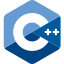
<br>

<div style="text-align:center; font-size:200%;">
  <b>SOLID: Interface Segregation Principle</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 08 SOLID Interface Segregation Principle.ipynb -->
<!-- slides/module_500_solid_grasp/topic_360_solid_isp.cpp -->

<!--
clang-format on
-->


## SOLID : Interface Segregation Principle

- No client of a class `C` should depend on methods it doesn’t use
- If that is not the case
- Divide the interface of `C` into multiple independent interfaces
- Replace `C` in each client with the interfaces actually used by the client

In [ ]:
#include <iostream>

In [ ]:
class Car {
public:
    void Drive() { std::cout << "Accelerating." << std::endl; }
    void Repair() { std::cout << "Repairing." << std::endl; }
};

In [ ]:
class Driver {
public:
    void Drive(Car& car) { car.Drive(); }
};

In [ ]:
class Mechanic {
public:
    void WorkOn(Car& car) { car.Repair(); }
};

In [ ]:
Driver d;
Mechanic m;
Car c;

In [ ]:
d.Drive(c);

In [ ]:
m.WorkOn(c);

In [ ]:
class Drivable {
public:
    virtual ~Drivable() = default;
    virtual void Drive() = 0;
};

In [ ]:
class Repairable {
public:
    virtual ~Repairable() = default;
    virtual void Repair() = 0;
};

In [ ]:
class Car2
    : public Drivable
    , public Repairable {
public:
    void Drive() override { std::cout << "Accelerating." << std::endl; }
    void Repair() override { std::cout << "Repairing." << std::endl; }
};

In [ ]:
class Driver2 {
public:
    void Drive(Drivable& car) { car.Drive(); }
};

In [ ]:
class Mechanic2 {
public:
    void WorkOn(Repairable& car) { car.Repair(); }
};

In [ ]:
Driver2 d2;
Mechanic2 m2;
Car2 c2;

In [ ]:
d2.Drive(c2);

In [ ]:
m2.WorkOn(c2);


## Workshop: Restaurant System

In this workshop, we will be working on a restaurant management system.

Imagine you've been given the codebase of a restaurant management system. The
system currently has a single interface `RestaurantOperations` that defines
all operations that can be done in a restaurant. Different roles in the
restaurant, like the customer, chef, cashier, and janitor, all use this same
interface, but each role only uses a subset of its functions.

Your task is to refactor this system to adhere to the Interface Segregation
Principle. This means that no client should be forced to depend on interfaces
it does not use.


1. Identify which operations are relevant to which roles.
2. Split the `RestaurantOperations `interface into smaller, role-specific
   interfaces.
3. Adjust the Restaurant class and role-based client classes (`Customer`,
   `Chef`, `Cashier`, `Janitor`) according to the new interfaces.
4. Ensure that each client class only knows about the operations that are
   relevant to its role.

In [ ]:
#include <iostream>

In [ ]:
class RestaurantOperations {
public:
    virtual void PlaceOrder() = 0;
    virtual void CookOrder() = 0;
    virtual void CalculateBill() = 0;
    virtual void CleanTables() = 0;
};

In [ ]:
class Restaurant : public RestaurantOperations {
public:
    void PlaceOrder() override {
        std::cout << "Order has been placed.\n";
    }

    void CookOrder() override {
        std::cout << "Order is being cooked.\n";
    }

    void CalculateBill() override {
        std::cout << "Bill is being calculated.\n";
    }

    void CleanTables() override {
        std::cout << "Tables are being cleaned.\n";
    }
};

In [ ]:
class Customer {
    RestaurantOperations* restaurant;
public:
    Customer(RestaurantOperations* r) : restaurant(r) {}

    void MakeOrder() {
        restaurant->PlaceOrder();
        restaurant->CalculateBill();
    }
};

In [ ]:
class Chef {
    RestaurantOperations* restaurant;
public:
    Chef(RestaurantOperations* r) : restaurant(r) {}

    void PrepareFood() {
        restaurant->CookOrder();
    }
};

In [ ]:
class Cashier {
    RestaurantOperations* restaurant;
public:
    Cashier(RestaurantOperations* r) : restaurant(r) {}

    void GenerateBill() {
        restaurant->CalculateBill();
    }
};

In [ ]:
class Janitor {
    RestaurantOperations* restaurant;
public:
    Janitor(RestaurantOperations* r) : restaurant(r) {}

    void Clean() {
        restaurant->CleanTables();
    }
};

In [ ]:
Restaurant restaurant;
Customer customer(&restaurant);
Chef chef(&restaurant);
Cashier cashier(&restaurant);
Janitor janitor(&restaurant);

In [ ]:
customer.MakeOrder();
chef.PrepareFood();
cashier.GenerateBill();
janitor.Clean();

In [ ]:
#include <iostream>

In [ ]:
#include <iostream>

In [ ]:
class Ordering {
public:
    virtual void PlaceOrder() = 0;
};

In [ ]:
class Cooking {
public:
    virtual void CookOrder() = 0;
};

In [ ]:
class Billing {
public:
    virtual void CalculateBill() = 0;
};

In [ ]:
class Cleaning {
public:
    virtual void CleanTables() = 0;
};

In [ ]:
class Restaurant : public Ordering, public Cooking, public Billing, public Cleaning {
public:
    void PlaceOrder() override {
        std::cout << "Order has been placed.\n";
    }

    void CookOrder() override {
        std::cout << "Order is being cooked.\n";
    }

    void CalculateBill() override {
        std::cout << "Bill is being calculated.\n";
    }

    void CleanTables() override {
        std::cout << "Tables are being cleaned.\n";
    }
};

In [ ]:
class Customer {
    Ordering* ordering;
    Billing* billing;
public:
    Customer(Ordering* o, Billing* b) : ordering(o), billing(b) {}

    void MakeOrder() {
        ordering->PlaceOrder();
        billing->CalculateBill();
    }
};

In [ ]:
class Chef {
    Cooking* cooking;
public:
    Chef(Cooking* c) : cooking(c) {}

    void PrepareFood() {
        cooking->CookOrder();
    }
};

In [ ]:
class Cashier {
    Billing* billing;
public:
    Cashier(Billing* b) : billing(b) {}

    void GenerateBill() {
        billing->CalculateBill();
    }
};

In [ ]:
class Janitor {
    Cleaning* cleaning;
public:
    Janitor(Cleaning* c) : cleaning(c) {}

    void Clean() {
        cleaning->CleanTables();
    }
};

In [ ]:
Restaurant restaurant;
Customer customer(&restaurant, &restaurant);
Chef chef(&restaurant);
Cashier cashier(&restaurant);
Janitor janitor(&restaurant);

In [ ]:
customer.MakeOrder();
chef.PrepareFood();
cashier.GenerateBill();
janitor.Clean();